In [ ]:
# Import 3rd party dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from google.colab import files
import pickle

In [ ]:
# Suppressing Warnings and Adjusting Display Width
# We ignore any warning messages that might arise during execution to maintain clean output.
# Additionally, we adjust the display width to ensure that the content is fully visible within the Jupyter notebook.

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load the data, exploratory data analysis, and data splitting

In [ ]:
# Load the data
!wget -O "full_data.csv" "https://drive.google.com/uc?export=download&id=1H-RhMLPAX0nhq_AWxUDVL1P4hZOkiyvQ"
dataset_df = pd.read_csv("full_data.csv")

--2024-08-22 16:18:57--  https://drive.google.com/uc?export=download&id=1H-RhMLPAX0nhq_AWxUDVL1P4hZOkiyvQ
Resolving drive.google.com (drive.google.com)... 209.85.145.139, 209.85.145.138, 209.85.145.100, ...
Connecting to drive.google.com (drive.google.com)|209.85.145.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1H-RhMLPAX0nhq_AWxUDVL1P4hZOkiyvQ&export=download [following]
--2024-08-22 16:18:57--  https://drive.usercontent.google.com/download?id=1H-RhMLPAX0nhq_AWxUDVL1P4hZOkiyvQ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125590 (123K) [application/octet-stream]
Saving to: ‘full_data.csv’

full_data.csv       100%[===================>] 122.65K  --.-KB/s  

In [ ]:
# Print the data table
dataset_df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
# Presprocess the data

dataset_df.isnull().sum()

,0
WBC,0
LYMp,0
NEUTp,0
LYMn,0
NEUTn,0
RBC,0
HGB,0
HCT,0
MCV,0
MCH,0


In [ ]:
dataset_df['Diagnosis'].value_counts()

,count
Diagnosis,
Healthy,336
Normocytic hypochromic anemia,279
Normocytic normochromic anemia,269
Iron deficiency anemia,189
Thrombocytopenia,73
Other microcytic anemia,59
Leukemia,47
Macrocytic anemia,18
Leukemia with thrombocytopenia,11


In [ ]:
dataset_df['Diagnosis'] = dataset_df['Diagnosis'].map({'Healthy': 0, 'Normocytic hypochromic anemia': 1, 'Normocytic normochromic anemia': 2, 'Iron deficiency anemia': 3, 'Thrombocytopenia': 4})

In [ ]:
x = dataset_df.drop(['Diagnosis'], axis=1)
y = dataset_df['Diagnosis']

In [ ]:
x

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028


In [ ]:
y

,Diagnosis
0,1.0
1,1.0
2,3.0
3,3.0
4,1.0
...,...
1276,0.0
1277,0.0
1278,0.0
1279,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
dataset_df = pd.DataFrame(x, columns=dataset_df.columns[:14])
dataset_df = dataset_df.assign(target = y)

In [ ]:
dataset_df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,target
0,0.204900,0.434272,0.009292,0.098558,0.057325,0.015765,0.178167,0.005979,0.156177,0.004958,0.228782,0.275385,0.046275,0.011773,1.0
1,0.204900,0.424883,0.009706,0.096154,0.061146,0.016547,0.178167,0.006194,0.156645,0.004765,0.107011,0.261538,0.046275,0.011038,1.0
2,0.142539,0.287559,0.011286,0.048077,0.049682,0.029182,0.195675,0.007676,0.146170,0.003767,0.221402,0.212308,0.066591,0.009566,3.0
3,0.115813,0.281690,0.011813,0.038462,0.042038,0.031977,0.142122,0.008295,0.147012,0.003960,0.225092,0.204615,0.032731,0.008094,3.0
4,0.075724,0.386150,0.009969,0.033654,0.022930,0.028734,0.107106,0.084568,0.149537,0.004185,0.223862,0.347692,0.049661,0.015453,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,0.080178,0.230575,0.014448,0.040403,0.059120,0.039132,0.242019,0.011891,0.149631,0.005409,0.281673,0.261538,0.066733,0.018416,0.0
1277,0.106904,0.230575,0.014448,0.040403,0.059120,0.039021,0.257467,0.011891,0.159918,0.006471,0.274293,0.315385,0.066733,0.018416,0.0
1278,0.187082,0.230575,0.014448,0.040403,0.059120,0.034772,0.237899,0.011891,0.157112,0.005924,0.264453,0.490769,0.066733,0.018416,0.0
1279,0.126503,0.230575,0.014448,0.040403,0.059120,0.037903,0.238929,0.011891,0.155242,0.005473,0.253383,0.252308,0.066733,0.018416,0.0


In [ ]:
predictor_columns = [col for col in dataset_df.columns if col != "target"]

# Count the number of predictor columns
num_predictor_columns = len(predictor_columns)

In [ ]:
# Normalize each predictor attribute using z-score
for predictor in predictor_columns:
    dataset_df[predictor] = (dataset_df[predictor] - dataset_df[predictor].mean()) / dataset_df[predictor].std()

In [ ]:
# Generate descriptive statistics for the dataset

dataset_df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,target
count,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1.281000e+03,1146.000000
mean,1.996841e-16,-2.124885e-16,8.392875e-17,5.269443e-17,1.081622e-16,1.109356e-16,6.545202e-16,-1.386695e-17,-1.497631e-16,8.320173e-18,1.331228e-15,1.996841e-16,3.050730e-16,-2.080043e-17,1.462478
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.244336
min,-1.981424e+00,-2.790987e+00,-5.198845e-01,-1.258347e+00,-1.615761e+00,-1.188509e+00,-5.818293e+00,-4.209576e-01,-6.074618e+00,-1.905613e-01,-6.132421e+00,-2.364900e+00,-1.967506e+00,-3.651854e-01,0.000000
25%,-5.225795e-01,-3.359663e-16,-4.339196e-02,0.000000e+00,-1.425342e-02,-1.839653e-01,-3.631231e-01,-6.628714e-02,-1.690329e-01,-5.923176e-02,-3.451599e-01,-7.845833e-01,-3.369335e-01,-1.317282e-01,0.000000
50%,-1.298137e-01,-3.359663e-16,6.241992e-17,0.000000e+00,0.000000e+00,-3.843070e-02,3.027852e-02,0.000000e+00,2.965969e-02,-3.854287e-02,7.903730e-02,-1.825580e-01,-9.144028e-10,0.000000e+00,1.000000
75%,2.292864e-01,-3.359663e-16,6.241992e-17,0.000000e+00,0.000000e+00,1.390505e-01,3.449998e-01,0.000000e+00,1.621214e-01,-2.235156e-02,3.517355e-01,6.774783e-01,1.289445e-01,0.000000e+00,2.000000
max,1.061513e+01,9.313473e+00,3.546275e+01,2.988663e+01,2.571431e+01,3.055932e+01,1.964791e+01,3.497935e+01,3.327019e+01,2.774934e+01,1.850131e+01,4.622895e+00,2.751592e+01,1.946408e+01,4.000000


In [ ]:
# Split dataset into training and test sets
train_df, test_df = train_test_split(dataset_df, test_size=0.1, random_state=42)

# Separate target variable from features
y_train = train_df["target"]
X_train = train_df.drop("target", axis=1)
y_test = test_df["target"]
X_test = test_df.drop("target", axis=1)

In [ ]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [ ]:
# Select specific classes
idx_train = np.column_stack(np.where((y_train==0) | (y_train==1) | (y_train==2) | (y_train==3) | (y_train==4)))
idx_test = np.column_stack(np.where((y_test==0) | (y_test==1) | (y_test==2) | (y_test==3) | (y_test==4)))

y_train = y_train[idx_train]
X_train = X_train[idx_train,:]
X_train = np.squeeze(X_train)

y_test = y_test[idx_test]
X_test = X_test[idx_test,:]
X_test = np.squeeze(X_test)

In [ ]:
train_df = pd.DataFrame(X_train, columns=dataset_df.columns[:14])
train_df = train_df.assign(target = y_train)

test_df = pd.DataFrame(X_test, columns=dataset_df.columns[:14])
test_df = test_df.assign(target = y_test)

In [ ]:
y_train = train_df["target"]
X_train = train_df.drop("target", axis=1)
y_test = test_df["target"]
X_test = test_df.drop("target", axis=1)

In [ ]:
X_train

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,0.262952,-2.109046e+00,2.496848e-02,-0.659405,0.682054,0.032562,0.318773,-0.044359,0.025980,-0.037643,0.139637,-0.730831,-5.033185e-01,-0.175501
1,-0.326197,-3.359663e-16,6.241992e-17,0.000000,0.000000,-0.137820,0.135186,0.000000,0.191557,-0.024151,0.169937,-0.978091,-9.144028e-10,0.000000
2,-1.139783,5.903056e-01,-9.686200e-02,-0.584537,-0.954269,-0.081026,-0.100855,-0.088216,-0.124879,-0.052036,0.048737,-0.472820,-3.369335e-01,-0.131728
3,0.150733,-3.359663e-16,6.241992e-17,0.000000,0.000000,0.777983,0.318773,0.000000,-0.750393,-0.114102,-0.617858,0.032451,-9.144028e-10,0.000000
4,0.428475,-3.359663e-16,6.241992e-17,0.000000,0.000000,-0.347248,-0.940112,0.000000,-0.305174,-0.080820,-0.587558,0.301212,-9.144028e-10,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,0.066569,-3.359663e-16,6.241992e-17,0.000000,0.000000,-0.208813,-0.258216,0.000000,-0.183751,-0.043940,0.563834,-0.279312,-9.144028e-10,0.000000
1027,-0.887291,2.777491e-01,-1.029535e-01,-0.434802,-0.780192,-0.116522,0.030279,-0.073914,0.073814,-0.036744,0.079037,-0.634077,-9.359195e-01,-0.160910
1028,-0.382306,-1.384483e+00,-1.902586e-02,-0.584537,-0.118700,-0.120072,-0.100855,-0.075821,0.062775,-0.045739,-0.284560,-0.902838,-4.034875e-01,-0.175501
1029,0.686578,-3.359663e-16,6.241992e-17,0.000000,0.000000,-0.617019,-0.730298,0.000000,0.449122,-0.004361,0.169937,-0.548073,-9.144028e-10,0.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Store the mean, standard deviation, and normalized PDF using KDE for each predictor attribute and class
predictor_info = {}
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name
    pdf_all = gaussian_kde(X_train[col_name])
    pdf0 = gaussian_kde(X_train[train_df['target'] == 0][col_name])
    pdf1 = gaussian_kde(X_train[train_df['target'] == 1][col_name])
    pdf2 = gaussian_kde(X_train[train_df['target'] == 2][col_name])
    pdf3 = gaussian_kde(X_train[train_df['target'] == 3][col_name])
    pdf4 = gaussian_kde(X_train[train_df['target'] == 4][col_name])
    predictor_info[i] = {
        'mean': X_train[col_name].mean(),
        'std': X_train[col_name].std(),
        'pdf': pdf_all,
        'pdf0': pdf0,
        'pdf1': pdf1,
        'pdf2': pdf2,
        'pdf3': pdf3,
        'pdf4': pdf4,
    }



In [ ]:
from scipy.stats import norm, entropy, gaussian_kde

def JSD(p, q):
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [ ]:
# Define the x values where you want to evaluate the PDF
x = np.linspace(-3, 3, 100)

# Calculate the uniform PDF along x
uniform_prior_x = 1/6*np.ones(100)

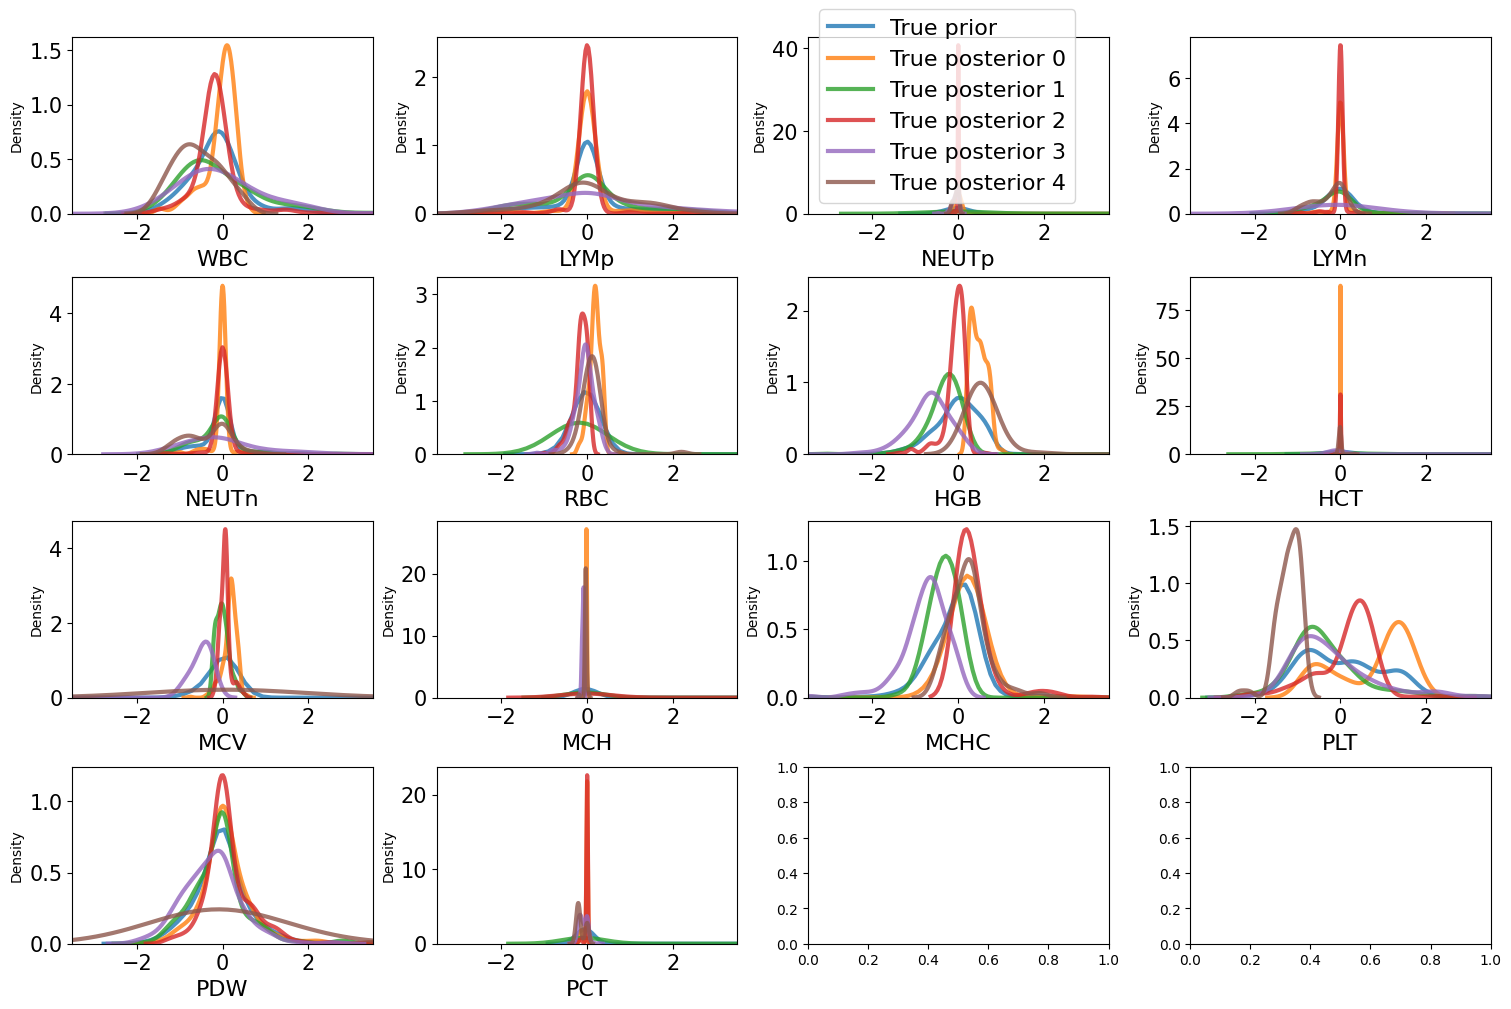

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Define the indices of the attributes to be plotted
selected_predictor_columns = predictor_columns

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 2], x=col_name, ax=axes[row, col], label='True posterior 2', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 3], x=col_name, ax=axes[row, col], label='True posterior 3', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 4], x=col_name, ax=axes[row, col], label='True posterior 4', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Add vertical lines at the mean of each attribute
    #axes[row, col].axvline(predictor_info[i]['mean'], linestyle='--', color='black', label='Mean')
    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

In [ ]:
# Set up the plot layout

prior_KLDs = []

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):


    # Plot uniform prior distribution
    true_prior_x = predictor_info[i]['pdf'](x)

    KLD_value = entropy(true_prior_x, uniform_prior_x)
    prior_KLDs.append(KLD_value)

prior_KLDs = np.array(prior_KLDs)

In [ ]:
# Get the indices that would sort the KLD values in descending order
prior_KLDs_sorted_indices = np.argsort(prior_KLDs)

# Display the indices order associated with descending order of KLD values
print("Indices order associated with descending order of KLD values:")
print(prior_KLDs_sorted_indices)

Indices order associated with descending order of KLD values:
[11  1  0 12 10  6  3  4  8  5  7  2  9 13]


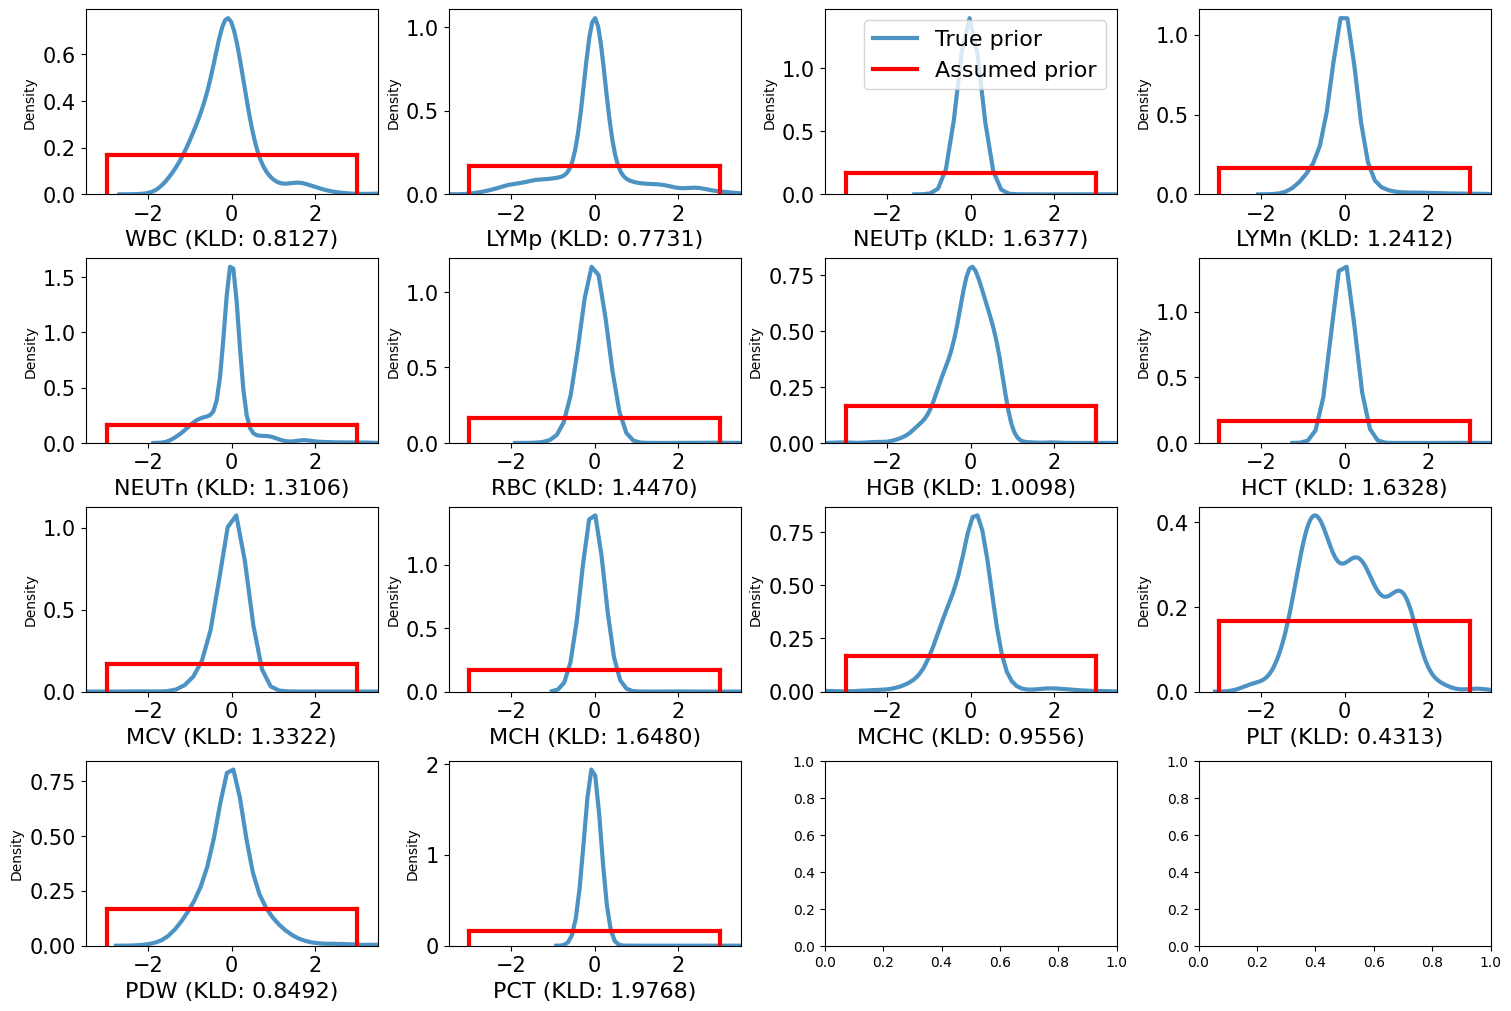

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Assumed prior', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name} (KLD: {prior_KLDs[i]:.4f})', fontsize=16)
    #axes[row, col].set_xlabel(col_name, fontsize=16)


    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

plt.show()

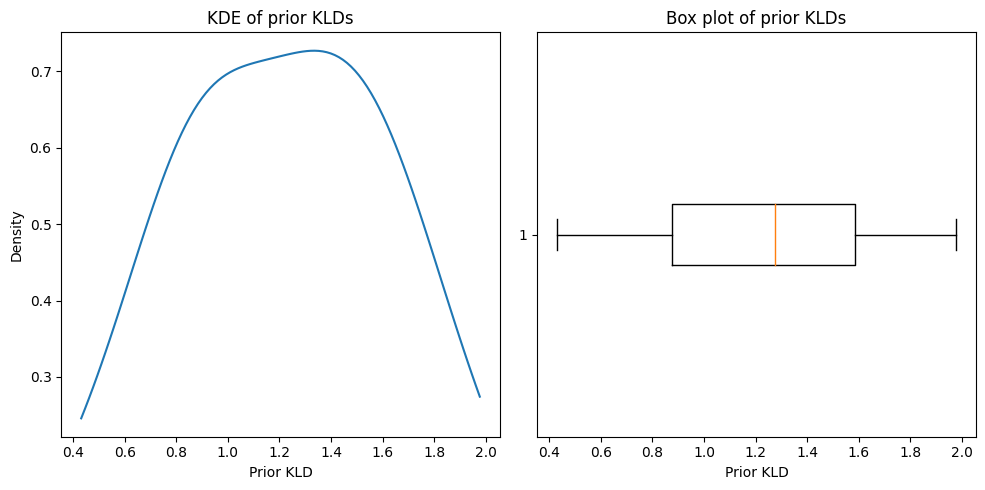

In [ ]:
# Create a figure with subplots for KDE and box plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot KDE of prior KLDs
kde = gaussian_kde(prior_KLDs)
y = np.linspace(min(prior_KLDs), max(prior_KLDs), 100)
ax1.plot(y, kde(y))
ax1.set_xlabel('Prior KLD')
ax1.set_ylabel('Density')
ax1.set_title('KDE of prior KLDs')

# Plot box plot of prior KLDs
ax2.boxplot(prior_KLDs, vert=False)
ax2.set_xlabel('Prior KLD')
ax2.set_title('Box plot of prior KLDs')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy, gaussian_kde


def proposal_within_range(current_params, scale):
    proposed_params = current_params + np.random.normal(0, scale, len(current_params))

    while not np.all(np.logical_and(-3 <= proposed_params, proposed_params <= 3)):
        idx_outside_range = np.where(np.logical_or(proposed_params < -3, proposed_params > 3))[0]
        proposed_params[idx_outside_range] = current_params[idx_outside_range] + np.random.normal(0, scale, len(idx_outside_range))

    return proposed_params



# Log Prior distribution
def log_uniform_prior(params):
    log_joint_probability = 0

    for i, param in enumerate(params):
        log_joint_probability += np.log(1/6)

    return log_joint_probability



# Likelihood function
def log_likelihood(params, data):
    feature_values = {col_name: [value] for col_name, value in zip(column_index_map.values(), params)}
    X_new = pd.DataFrame(feature_values)

    if data == 0:
        return np.log(ml.predict_proba(X_new)[0, 0])
    elif data == 1:
        return np.log(ml.predict_proba(X_new)[0, 1])
    elif data == 2:
        return np.log(ml.predict_proba(X_new)[0, 2])
    elif data == 3:
        return np.log(ml.predict_proba(X_new)[0, 3])
    else:
        return np.log(ml.predict_proba(X_new)[0, 4])



# Metropolis-Hastings MCMC algorithm
def metropolis_hastings(num_samples, initial_params, data):
    np.random.seed(42)

    current_params = initial_params
    accepted_params = [[] for _ in range(len(initial_params))]

    current_log_posterior = log_uniform_prior(current_params) + log_likelihood(current_params, data)

    iter = 0
    num_accepted = 0

    while num_accepted < num_samples:
        # Generate proposed params until likelihood >= 0.8
        proposed_params = np.zeros_like(current_params)
        proposed_likelihood = -np.inf

        iter = iter + 1

        num_proposing = 0
        while proposed_likelihood < np.log(0.5):
            num_proposing = num_proposing + 1
            proposed_params = proposal_within_range(current_params, 1)
            proposed_likelihood = log_likelihood(proposed_params, data)

        # Calculate acceptance probability
        proposed_log_posterior = log_uniform_prior(proposed_params) + proposed_likelihood
        acceptance_probability = np.exp(proposed_log_posterior - current_log_posterior)


        # Accept or reject the proposed parameter
        if np.random.rand() < acceptance_probability:
            num_accepted = num_accepted + 1

            if num_accepted % 1000 == 0:
                print("Num samples accepted: ", num_accepted)

            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            for i, param in enumerate(current_params):
                accepted_params[i].append(param)

    return accepted_params

In [ ]:
# Configuration settings for running MCMC and saving samples

run_MCMC = True
save_samples = True

data_shifts = [0, 0.05, 0.16, 0.19, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

samples_0_file_name = 'anemia_dnn_class_0_samples.pickle'
samples_1_file_name = 'anemia_dnn_class_1_samples.pickle'
samples_2_file_name = 'anemia_dnn_class_2_samples.pickle'
samples_3_file_name = 'anemia_dnn_class_3_samples.pickle'
samples_4_file_name = 'anemia_dnn_class_4_samples.pickle'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class0_samples = []
class1_samples = []
class2_samples = []
class3_samples = []
class4_samples = []

original_training_accuracies = []
original_test_accuracies = []

for shift in data_shifts:

    print('\n\n\nInverse estimation for data with shift ', shift)

    # Shift every value in the DataFrame to the right
    X_train_shifted = X_train.add(shift)

    # Resample the training set using RandomOverSampler to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_shifted, y_train)



    print('\nModel evaluation on training set:')

    # Initialize Random Forest classifier

    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_train, y_pred_proba, multi_class='ovr')
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='micro')
    recall = recall_score(y_train, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    original_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)



    print('\nModel evaluation on test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    if run_MCMC:

        # Run MCMC
        num_samples = 5000
        initial_params = np.zeros(num_predictor_columns)

        print('\nMCMC for class 0')
        accepted_params_zero = metropolis_hastings(num_samples, initial_params, 0)
        class0_samples.append(accepted_params_zero)

        print('\nMCMC for class 1')
        accepted_params_one = metropolis_hastings(num_samples, initial_params, 1)
        class1_samples.append(accepted_params_one)

        print('\nMCMC for class 2')
        accepted_params_two = metropolis_hastings(num_samples, initial_params, 2)
        class2_samples.append(accepted_params_two)

        print('\nMCMC for class 3')
        accepted_params_three = metropolis_hastings(num_samples, initial_params, 3)
        class3_samples.append(accepted_params_three)

        print('\nMCMC for class 4')
        accepted_params_four = metropolis_hastings(num_samples, initial_params, 4)
        class4_samples.append(accepted_params_four)

if save_samples:

    # Save the list to a file
    with open(samples_0_file_name, 'wb') as f:
        pickle.dump(class0_samples, f)

    files.download(samples_0_file_name)

    # Save the list to a file
    with open(samples_1_file_name, 'wb') as f:
        pickle.dump(class1_samples, f)

    files.download(samples_1_file_name)

    # Save the list to a file
    with open(samples_2_file_name, 'wb') as f:
        pickle.dump(class2_samples, f)

    files.download(samples_2_file_name)

    # Save the list to a file
    with open(samples_3_file_name, 'wb') as f:
        pickle.dump(class3_samples, f)

    files.download(samples_3_file_name)

    # Save the list to a file
    with open(samples_4_file_name, 'wb') as f:
        pickle.dump(class4_samples, f)

    files.download(samples_4_file_name)

if ~ run_MCMC:
    # Load the list from the file
    with open(samples_0_file_name, 'rb') as f:
        class0_samples = pickle.load(f)

    with open(samples_1_file_name, 'rb') as f:
        class1_samples = pickle.load(f)

    with open(samples_2_file_name, 'rb') as f:
        class2_samples = pickle.load(f)

    with open(samples_3_file_name, 'rb') as f:
        class3_samples = pickle.load(f)

    with open(samples_4_file_name, 'rb') as f:
        class4_samples = pickle.load(f)

original_training_accuracies = np.array(original_training_accuracies)
original_test_accuracies = np.array(original_test_accuracies)





Inverse estimation for data with shift  0

Model evaluation on training set:
Confusion Matrix:
[[295   0   0   2   2]
 [  0 251   0   2   0]
 [  0   0 241   0   0]
 [  0   0   0 174   0]
 [  0   1   0   0  63]]
Precision: 0.9932104752667313
Recall: 0.9932104752667313
Cohen Kappa Score: 0.9911749636519045
Accuracy: 0.9932104752667313
Geometric Mean Score: 0.9925969141164619

Model evaluation on test set:
Confusion Matrix:
[[34  0  0  1  2]
 [ 0 21  1  4  0]
 [ 0  3 25  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0  9]]
Precision: 0.9043478260869565
Recall: 0.9043478260869565
Cohen Kappa Score: 0.8761746280344558
Accuracy: 0.9043478260869565
Geometric Mean Score: 0.9210029545729281

MCMC for class 0
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000

MCMC for class 1
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accepted_params_zero = class0_samples[0]
accepted_params_one = class1_samples[0]
accepted_params_two = class2_samples[0]
accepted_params_three = class3_samples[0]
accepted_params_four = class4_samples[0]

In [ ]:
# Define the est_posterior function with list comprehension
def est_posterior(a, prob, bins):
    return np.array([prob[np.digitize(val, bins) - 1] if (val > np.min(bins)) and (val < np.max(bins) and (prob[np.digitize(val, bins) - 1] != 0)) else 1e-9 for val in a])

In [ ]:
avg_posterior_KLDs = []


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_one[i], bins=100, density=True)
    est_post1 = est_posterior(x, prob, bins)


     # Posterior histogram
    prob, bins = np.histogram(accepted_params_zero[i], bins=100, density=True)
    est_post0 = est_posterior(x, prob, bins)

     # Posterior histogram
    prob, bins = np.histogram(accepted_params_two[i], bins=100, density=True)
    est_post2 = est_posterior(x, prob, bins)

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_three[i], bins=100, density=True)
    est_post3 = est_posterior(x, prob, bins)

     # Posterior histogram
    prob, bins = np.histogram(accepted_params_four[i], bins=100, density=True)
    est_post4 = est_posterior(x, prob, bins)


     # Prior distribution
    true_posterior1_x = predictor_info[i]['pdf1'](x)

    # Prior distribution
    true_posterior0_x = predictor_info[i]['pdf0'](x)

    # Prior distribution
    true_posterior2_x = predictor_info[i]['pdf2'](x)

    # Prior distribution
    true_posterior3_x = predictor_info[i]['pdf3'](x)

    # Prior distribution
    true_posterior4_x = predictor_info[i]['pdf4'](x)

    avg_KLD_value = (1/5)*entropy(true_posterior0_x, est_post0) + (1/5)*entropy(true_posterior1_x, est_post1) + (1/5)*entropy(true_posterior2_x, est_post2) + (1/5)*entropy(true_posterior3_x, est_post3) + (1/5)*entropy(true_posterior4_x, est_post4)
    avg_posterior_KLDs.append(avg_KLD_value)


avg_posterior_KLDs = np.array(avg_posterior_KLDs)

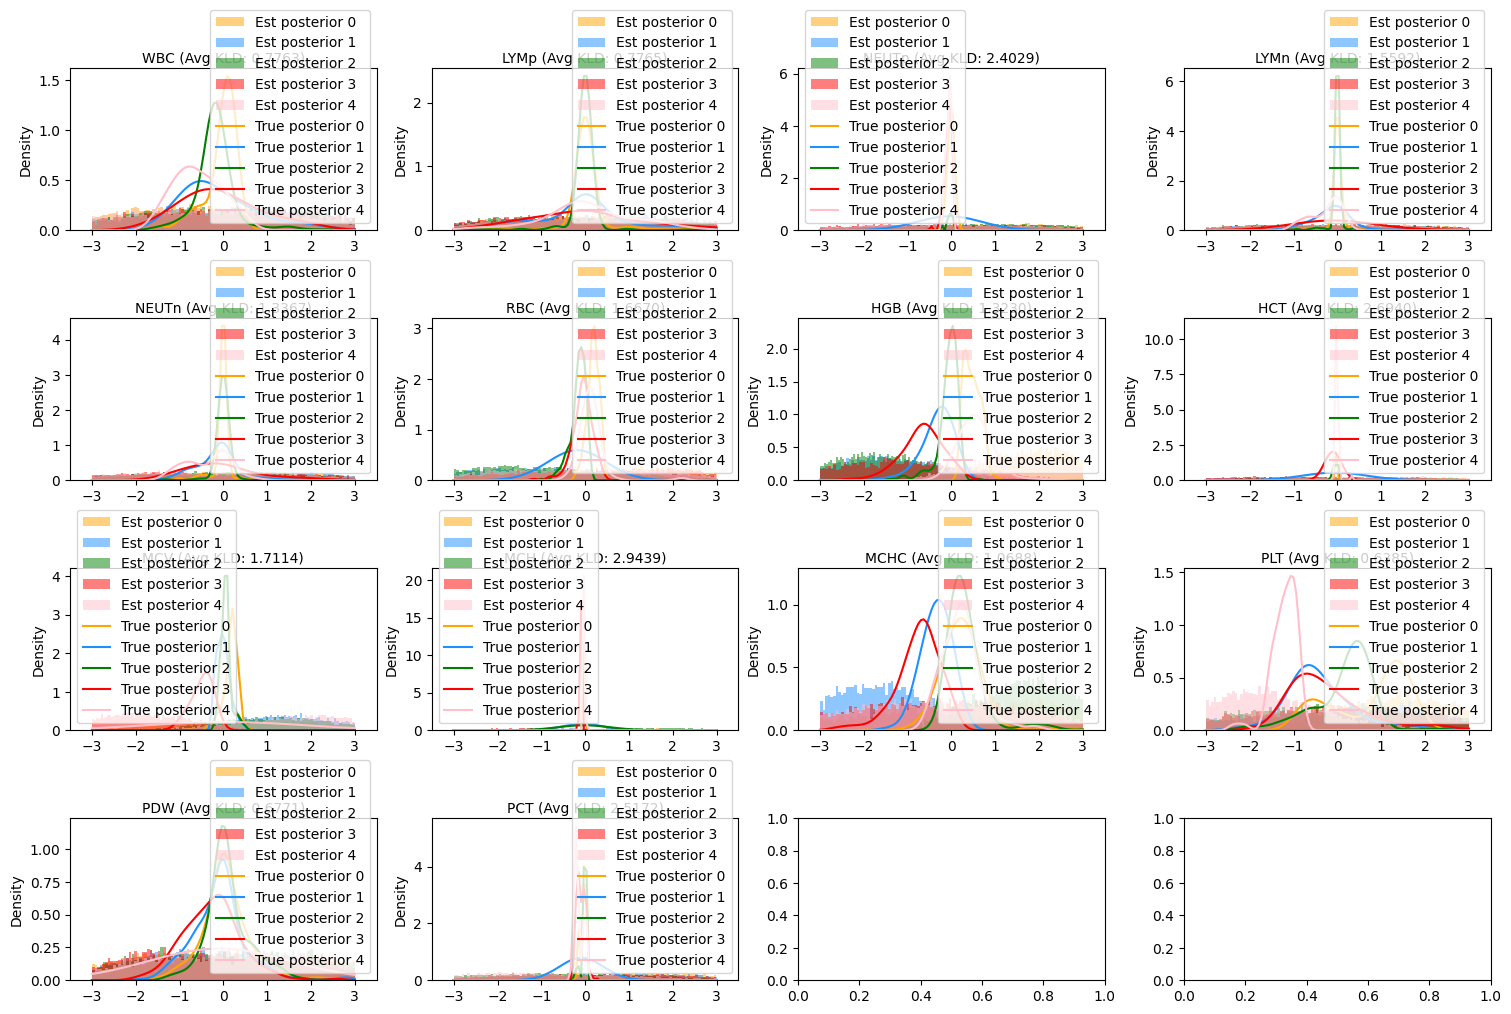

In [ ]:
# Set up the plot layout
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[i], bins=100, density=True, alpha=0.5, label='Est posterior 0', color='orange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[i], bins=100, density=True, alpha=0.5, label='Est posterior 1', color='dodgerblue')
    post2, bins2, _ = axes[row, col].hist(accepted_params_two[i], bins=100, density=True, alpha=0.5, label='Est posterior 2', color='green')
    post3, bins3, _ = axes[row, col].hist(accepted_params_three[i], bins=100, density=True, alpha=0.5, label='Est posterior 3', color='red')
    post4, bins4, _ = axes[row, col].hist(accepted_params_four[i], bins=100, density=True, alpha=0.5, label='Est posterior 4', color='pink')

    # Prior distribution
    posterior0_x = predictor_info[i]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True posterior 0', color='orange')

    # Prior distribution
    posterior1_x = predictor_info[i]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True posterior 1', color='dodgerblue')

    # Prior distribution
    posterior2_x = predictor_info[i]['pdf2'](x)
    axes[row, col].plot(x, posterior2_x, label='True posterior 2', color='green')

    # Prior distribution
    posterior3_x = predictor_info[i]['pdf3'](x)
    axes[row, col].plot(x, posterior3_x, label='True posterior 3', color='red')

    # Prior distribution
    posterior4_x = predictor_info[i]['pdf4'](x)
    axes[row, col].plot(x, posterior4_x, label='True posterior 4', color='pink')

    axes[row, col].xaxis.set_label_position('top')
    axes[row, col].set_xlim(-3.5, 3.5)
    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[i]:.4f})')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.show()

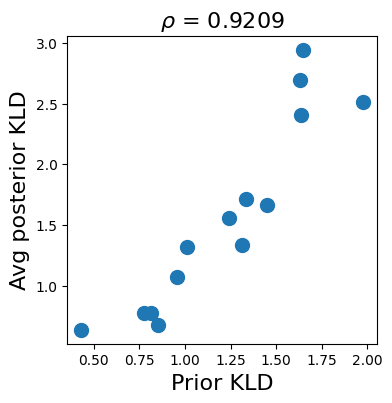

In [ ]:
avg_post_KLDs_all_params = []

for i, shift in enumerate(data_shifts):

    #print('\n\n\nPrior JSD vs  Avg posterior KLD for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]
    accepted_params_two = class2_samples[i]
    accepted_params_three = class3_samples[i]
    accepted_params_four = class4_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)
    accepted_params_two = np.array(accepted_params_two)
    accepted_params_three = np.array(accepted_params_three)
    accepted_params_four = np.array(accepted_params_four)

    avg_posterior_KLDs = []


    # Plot the KDEs for each attribute and class
    for j, col_name in enumerate(predictor_columns):
        row = j // ncols
        col = j % ncols

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_one[j], bins=100, density=True)
        est_post1 = est_posterior(x, prob, bins)


        # Posterior histogram
        prob, bins = np.histogram(accepted_params_zero[j], bins=100, density=True)
        est_post0 = est_posterior(x, prob, bins)

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_two[j], bins=100, density=True)
        est_post2 = est_posterior(x, prob, bins)

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_three[j], bins=100, density=True)
        est_post3 = est_posterior(x, prob, bins)

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_four[j], bins=100, density=True)
        est_post4 = est_posterior(x, prob, bins)


        # Prior distribution
        true_posterior1_x = predictor_info[j]['pdf1'](x)

        # Prior distribution
        true_posterior0_x = predictor_info[j]['pdf0'](x)

        # Prior distribution
        true_posterior2_x = predictor_info[j]['pdf2'](x)

        # Prior distribution
        true_posterior3_x = predictor_info[j]['pdf3'](x)

        # Prior distribution
        true_posterior4_x = predictor_info[j]['pdf4'](x)

        avg_KLD_value = (1/5)*entropy(true_posterior0_x, est_post0) + (1/5)*entropy(true_posterior1_x, est_post1) + (1/5)*entropy(true_posterior2_x, est_post2) + (1/5)*entropy(true_posterior3_x, est_post3) + (1/5)*entropy(true_posterior4_x, est_post4)
        avg_posterior_KLDs.append(avg_KLD_value)


    avg_posterior_KLDs = np.array(avg_posterior_KLDs)
    avg_post_KLDs_all_params.append(np.mean(avg_posterior_KLDs))


    if shift==0:
        plt.figure(figsize=(4, 4))

        # Create a scatter plot of the two sets of importance values
        plt.scatter(prior_KLDs, avg_posterior_KLDs, s=100)


        # Calculate the correlation coefficient between the two sets of importance values
        correlation_coefficient = np.corrcoef(prior_KLDs, avg_posterior_KLDs)[0, 1]

        # Set the axis labels and title
        plt.xlabel('Prior KLD', fontsize=16)
        plt.ylabel('Avg posterior KLD', fontsize=16)
        plt.title('$\\rho$ = {:.4f}'.format(correlation_coefficient), fontsize=16)

        # Display the plot
        plt.show()

avg_post_KLDs_all_params = np.array(avg_post_KLDs_all_params)


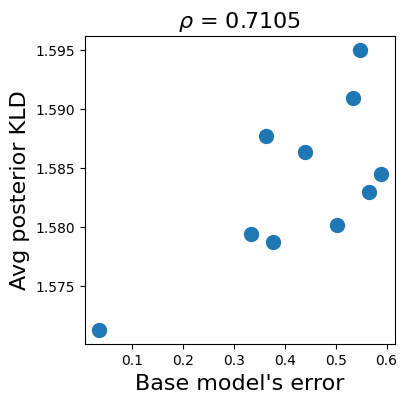

In [ ]:
plt.figure(figsize=(4, 4))

# Create a scatter plot of the two sets of importance values
plt.scatter(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:], s=100)


# Calculate the correlation coefficient between the two sets of importance values
training_correlation_coefficient = np.corrcoef(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:])[0, 1]

# Set the axis labels and title
plt.xlabel('Base model\'s error', fontsize=16)
plt.ylabel('Avg posterior KLD', fontsize=16)
plt.title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Display the plot
plt.show()


In [ ]:
synthetic_training_accuracies = []
synthetic_test_accuracies = []

for i, shift in enumerate(data_shifts):

    print('\n\n\nSynthetic models for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]
    accepted_params_two = class2_samples[i]
    accepted_params_three = class3_samples[i]
    accepted_params_four = class4_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)
    accepted_params_two = np.array(accepted_params_two)
    accepted_params_three = np.array(accepted_params_three)
    accepted_params_four = np.array(accepted_params_four)

    # Concatenate accepted_params_one and accepted_params_zero along the rows axis
    simulated_dataset = np.concatenate((accepted_params_one, accepted_params_zero, accepted_params_two, accepted_params_three, accepted_params_four), axis=1)

    # Transpose the dataset to have 2000 records and 15 predictor attributes
    simulated_dataset = simulated_dataset.T

    # Create an array of class labels (1 for class 1 and 0 for class 0)
    class_labels = np.concatenate((np.ones(accepted_params_one.shape[1]), np.zeros(accepted_params_zero.shape[1]), np.full(accepted_params_two.shape[1], 2), np.full(accepted_params_two.shape[1], 3), np.full(accepted_params_two.shape[1], 4)))

    # Add the class labels as the 16th attribute
    simulated_dataset = np.column_stack((simulated_dataset, class_labels))

    data_columns = [col for col in train_df.columns]

    # Convert binary_dataset to a DataFrame
    simulated_dataset_df = pd.DataFrame(simulated_dataset)

    # Rename the columns of simulated_dataset_df to match dataset_df
    simulated_dataset_df.columns = train_df.columns

    # Check the first few rows of simulated_dataset_df
    simulated_dataset_df

    # Separate target variable from features
    sim_train_y = simulated_dataset_df["target"]
    sim_train_X = simulated_dataset_df.drop("target", axis=1)

    print('\nSynthetic model evaluation on original training set:')

    # Initialize Random Forest classifier
    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(sim_train_X, sim_train_y)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='micro')
    recall = recall_score(y_train, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    synthetic_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    print('\nSynthetic model evaluation on original test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    #auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    #print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    synthetic_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


synthetic_training_accuracies = np.array(synthetic_training_accuracies)
synthetic_test_accuracies = np.array(synthetic_test_accuracies)




Synthetic models for data with shift  0

Synthetic model evaluation on original training set:
Confusion Matrix:
[[281   1   0   3  14]
 [  7 210   3  31   2]
 [ 76  41 121   2   1]
 [  0   0   0 174   0]
 [  1   1   0   0  62]]
Precision: 0.8225024248302619
Recall: 0.8225024248302619
Cohen Kappa Score: 0.769443395569307
Accuracy: 0.8225024248302619
Geometric Mean Score: 0.8238019007765768

Synthetic model evaluation on original test set:
Confusion Matrix:
[[31  0  0  1  5]
 [ 1 19  1  5  0]
 [ 6  6 16  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0  9]]
Precision: 0.782608695652174
Recall: 0.782608695652174
Cohen Kappa Score: 0.7195669137729224
Accuracy: 0.782608695652174
Geometric Mean Score: 0.8105511658997246



Synthetic models for data with shift  0.05

Synthetic model evaluation on original training set:
Confusion Matrix:
[[252  19   3   3  22]
 [  0 229   5  19   0]
 [  1  11 229   0   0]
 [  0   4   0 170   0]
 [  1   5   3   0  55]]
Precision: 0.906886517943744
Recall: 0.90688651794

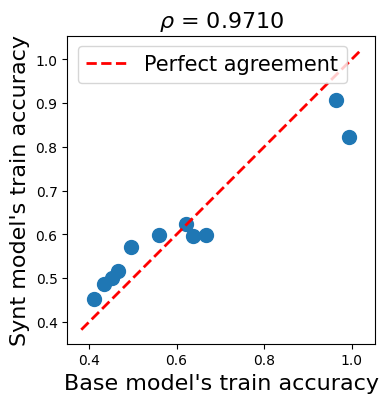

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the training accuracy values
ax.scatter(original_training_accuracies[:], synthetic_training_accuracies[:], s=100)

# Calculate the correlation coefficient between the training accuracy values
training_correlation_coefficient = np.corrcoef(original_training_accuracies[:], synthetic_training_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's train accuracy", fontsize=16)
ax.set_ylabel("Synt model's train accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red', label='Perfect agreement')


# Add a legend to the plot
ax.legend(fontsize=15)

# Display the plot
plt.show()

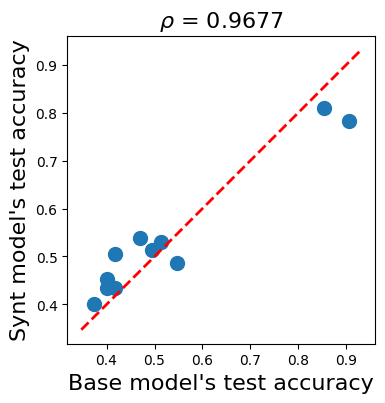

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the test accuracy values
ax.scatter(original_test_accuracies[:], synthetic_test_accuracies[:], s=100)

# Calculate the correlation coefficient between the test accuracy values
test_correlation_coefficient = np.corrcoef(original_test_accuracies[:], synthetic_test_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's test accuracy", fontsize=16)
ax.set_ylabel("Synt model's test accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(test_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red')


# Display the plot
plt.show()